In [1]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, r2_score, recall_score, ConfusionMatrixDisplay
import pickle
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
df1 = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1')
df = pd.concat([df1, df2])
df = df[(df['Sentiment'] == 'Positive') | (df['Sentiment'] == 'Negative')]
df['Len'] = df['OriginalTweet'].apply(len)
# df = df.dropna()
# df = df[0:100]
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Len
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,250
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,180
...,...,...,...,...,...,...,...
3784,3785,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive,291
3790,3791,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive,217
3792,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,215
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127


In [3]:
df.isna().sum()

UserName            0
ScreenName          0
Location         4918
TweetAt             0
OriginalTweet       0
Sentiment           0
Len                 0
dtype: int64

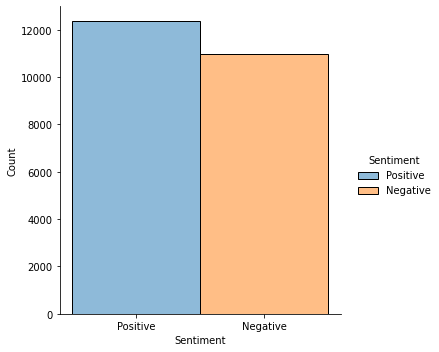

In [4]:
sns.displot(df, x='Sentiment', hue='Sentiment')

# Preprocessing

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
stopword_list = set(stopwords.words('english'))

In [7]:
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def clean_stopword(text):
    return " ".join([word.lower() for word in word_tokenize(text) if word not in stopword_list])

In [10]:
def clean_special_character(text):
    return re.sub('[^a-zA-Z\s]', "", text)

In [11]:
# lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize(sentence):
    
    return 

In [12]:
# remove punctuation 
def clean_punctuation(sentence):
    for punc in string.punctuation:
        if punc in sentence:
            sentence = sentence.replace(punc, " ")
    return sentence.strip()

In [13]:
# POS tag

In [14]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_stopword)

In [15]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_special_character)

In [16]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_punctuation)

In [17]:
df['Len'] = df['OriginalTweet'].apply(len)

In [18]:
encoder = LabelEncoder()

df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

In [19]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Len
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,1,196
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly...,1,120
3,3802,48754,NaN,16-03-2020,my food stock one empty please nt panic the...,1,221
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news regions first confirmed covid case cam...,1,209
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier grocery store sharing insights covid ...,1,136
...,...,...,...,...,...,...,...
3784,3785,48737,Paraparaumu Beach,16-03-2020,just k piti new world busy staff say s way s...,1,203
3790,3791,48743,"Cincinnati, Ohio",16-03-2020,even though law library closed all subscriber...,1,171
3792,3793,48745,Washington D.C.,16-03-2020,ricepolitics mdcounties craig call general a...,0,157
3793,3794,48746,Israel ??,16-03-2020,meanwhile in a supermarket israel people danc...,1,108


# SMOTE

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['OriginalTweet'])
y = df['Sentiment']

In [22]:
sm = SMOTE(random_state=1)

In [23]:
X_res, y_res = sm.fit_resample(X, y)

In [24]:
y_res

0        1
1        1
2        1
3        1
4        1
        ..
24733    0
24734    0
24735    0
24736    0
24737    0
Name: Sentiment, Length: 24738, dtype: int32

In [25]:
df_resampled = pd.DataFrame()
df_resampled['Sentiment'] = y_res
df_resampled['SentimentLabel'] =  encoder.inverse_transform(y_res)
df_resampled 

,Sentiment,SentimentLabel
0,1,Positive
1,1,Positive
2,1,Positive
3,1,Positive
4,1,Positive
...,...,...
24733,0,Negative
24734,0,Negative
24735,0,Negative
24736,0,Negative


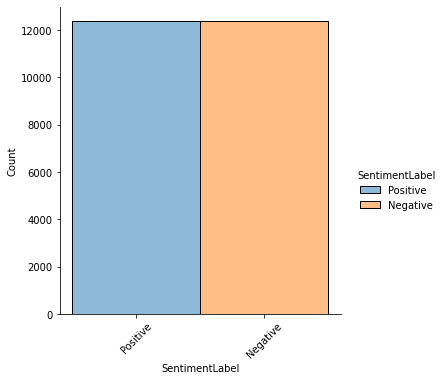

In [26]:
sns.displot(df_resampled, x='SentimentLabel', hue='SentimentLabel')
plt.xticks(rotation=45)
plt.show()

# Word cloud

In [27]:
texts = " ".join([word for word in df['OriginalTweet']])

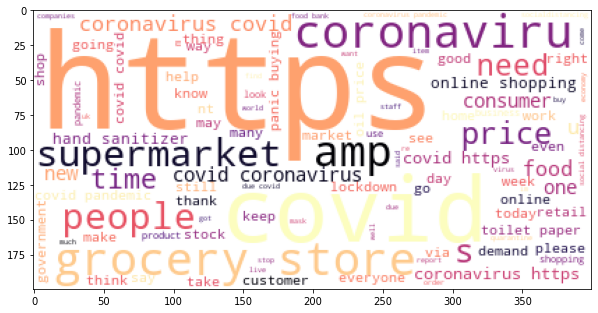

In [28]:
wc = WordCloud(max_words=100, colormap='magma', background_color='white')
wc.generate(texts)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.show()

# Modeling

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_predict = rf.predict(X_test)

In [34]:
print(f'Accuracy : {accuracy_score(y_test, y_predict)}')
print(f'r2 score : {r2_score(y_test, y_predict)}')

Accuracy : 0.7457558609539208
r2 score : -0.017004637034154113


In [35]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1831,  630],
       [ 628, 1859]], dtype=int64)

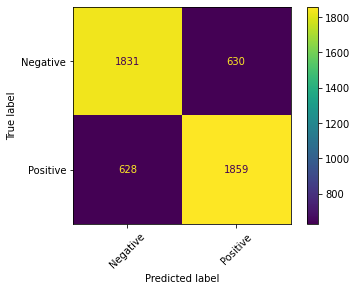

In [36]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.inverse_transform(rf.classes_))
cm_display.plot(xticks_rotation=45)
plt.show()

# SVM

In [37]:
from sklearn.svm import SVC

In [38]:
clf = SVC()

In [39]:
clf.fit(X_train, y_train)

SVC()

In [40]:
y_predict = clf.predict(X_test)

In [41]:
print(f'Accuracy : {accuracy_score(y_test, y_predict)}')
print(f'r2 score : {r2_score(y_test, y_predict)}')

Accuracy : 0.7916329830234439
r2 score : 0.1665089182971281


In [42]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1887,  574],
       [ 457, 2030]], dtype=int64)

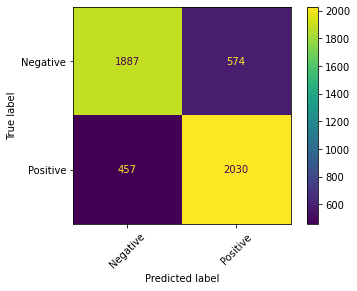

In [43]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.inverse_transform(clf.classes_))
cm_display.plot(xticks_rotation=45)
plt.show()

# Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
clf = MultinomialNB()

In [46]:
clf.fit(X_train, y_train)

MultinomialNB()

In [47]:
y_predict = clf.predict(X_test)

In [48]:
print(f'Accuracy : {accuracy_score(y_test, y_predict)}')
print(f'r2 score : {r2_score(y_test, y_predict)}')

Accuracy : 0.7263540824575586
r2 score : -0.09461389391434394


In [49]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1860,  601],
       [ 753, 1734]], dtype=int64)

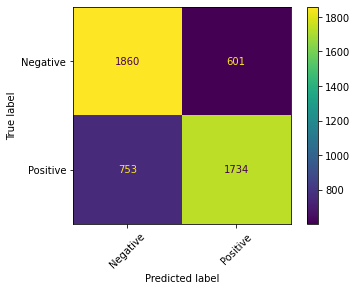

In [50]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.inverse_transform(clf.classes_))
cm_display.plot(xticks_rotation=45)
plt.show()

In [51]:
message = 'Covid made world economic gradually worse'
vectorized_message = tfidf.transform([message])
# vectorized_message
clf.predict((vectorized_message))
encoder.inverse_transform(clf.predict((vectorized_message)))

array(['Negative'], dtype=object)